# readme
descrip: plot time series of sea surface height (SSH) in the Gulf of Mexico (GoM) and Volume Flux in the Yucatan Channel and Florida Strait (from diagnostic transports) for CESM-POP submeso parameterization runs <br>

update history: <br>
v1.0 DL 2021Nov02 <br>
$\;\;\;\;$ - first write the jupyter lab, use the mask created in CalcGoMmask_2021Nov02.ipynb <br>
 
extra notes: <br>
the scripts for mask are copied from CalcGoMmask_2021Nov02.ipynb <br>

# import modules

In [1]:
# general python packages
import numpy as np
# from scipy import stats
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
# import matplotlib.dates as mdates
%matplotlib inline
import proplot as plot
import cartopy
# import cartopy.crs as ccrs
cartopy.config['pre_existing_data_dir']='/ihesp/shared/cartopy_features'
# from cartopy.mpl.geoaxes import GeoAxes
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
# from mpl_toolkits.axes_grid1 import AxesGrid

# python GCM(POP) packages
# import xgcm
# import pop_tools
# import xoak
# import xesmf as xe
import glob
import cftime

# dask jupyter lab packages
# from dask.distributed import Client
# from dask.distributed import performance_report

# file name with time packages
# from itertools import product
# from cftime import DatetimeNoLeap

# include dask 

In [2]:
# client = Client("tcp://10.73.2.251:45083")
# client

# define parameters

In [3]:
# === Gulf of Mexico for diagnostic transports ===
nlon1_r_t12, nlon2_r_t12 = 100, 292
nlat1_r_t12, nlat2_r_t12 = 1360, 1520
# =================================================

# chunks_HR = {'nlat':400,'nlon':300}

# load files

In [4]:
infile0_HR = ('/scratch/user/sanjiv/CESM/cesm.output/0.1deg/fosi_submeso_5km/ocn/hist/'
              'cmpr_submeso_5km.pop.h.nday1.0277-01-01.nc')
ds0_HR = xr.open_dataset(infile0_HR)
ds0_HR

<xarray.Dataset>
Dimensions:                 (d2: 2, nlat: 2400, nlon: 3600, time: 31, z_t: 62, z_t_150m: 15, z_w: 62, z_w_bot: 62, z_w_top: 62)
Coordinates:
  * time                    (time) object 0277-01-02 00:00:00 ... 0277-02-01 ...
  * z_t                     (z_t) float32 500.0 1.5e+03 ... 5.625e+05 5.875e+05
  * z_t_150m                (z_t_150m) float32 500.0 1.5e+03 ... 1.45e+04
  * z_w                     (z_w) float32 0.0 1e+03 2e+03 ... 5.5e+05 5.75e+05
  * z_w_top                 (z_w_top) float32 0.0 1e+03 ... 5.5e+05 5.75e+05
  * z_w_bot                 (z_w_bot) float32 1e+03 2e+03 ... 5.75e+05 6e+05
    ULONG                   (nlat, nlon) float64 ...
    ULAT                    (nlat, nlon) float64 ...
    TLONG                   (nlat, nlon) float64 ...
    TLAT                    (nlat, nlon) float64 ...
Dimensions without coordinates: d2, nlat, nlon
Data variables: (12/65)
    time_bound              (time, d2) object ...
    dz                      (z_t) float32 ...
    dzw                     (z_w) float32 ...
    KMT                     (nlat, nlon) float64 ...
    KMU                     (nlat, nlon) float64 ...
    REGION_MASK             (nlat, nlon) float64 ...
    ...                      ...
    TAUY_2                  (time, nlat, nlon) float32 ...
    KPP_SRC_TEMP_2          (time, nlat, nlon) float32 ...
    WTT_2                   (time, nlat, nlon) float32 ...
    QFLUX_2                 (time, nlat, nlon) float32 ...
    HMXL_2                  (time, nlat, nlon) float32 ...
    HBLT                    (time, nlat, nlon) float32 ...
Attributes:
    title:             submeso_5km
    history:           none
    Conventions:       CF-1.0; http://www.cgd.ucar.edu/cms/eaton/netcdf/CF-cu...
    time_period_freq:  day_1
    model_doi_url:     https://doi.org/10.5065/D67H1H0V
    contents:          Diagnostic and Prognostic Variables
    source:            CCSM POP2, the CCSM Ocean Component
    revision:          $Id: tavg.F90 90507 2019-01-18 20:54:19Z altuntas@ucar...
    calendar:          All years have exactly  365 days.
    start_time:        This dataset was created on 2021-10-12 at 10:01:18.2
    cell_methods:      cell_methods = time: mean ==> the variable values are ...

In [5]:
infiles_dt_TH = ('/scratch/user/dapengli/Projects4iHESP/Project_SeaLevelGulfMexico_2021Jul17/'
                 'raw_data/fosi_submeso_5km/'
                 'submeso_5km.pop.dt.0277-01-01-00000')

colnames=['time', 'Qv', 'Qh', 'Qs','channel_name'] 

df_TH = pd.read_csv(infiles_dt_TH, sep='  ', engine='python',  usecols=[0,1,2,3,4], 
                     header=None, skiprows=[0], names=colnames, index_col=[0])
df_TH

,Qv,Qh,Qs,channel_name
time,,,,
100741.0,112.455000,1.347594,3867.970000,ACC-Drake
100741.0,24.560650,1.975579,884.891800,Florida Strait
100741.0,21.261110,1.744148,766.506900,Yucatan Passage (Zonal)
100741.0,-1.521224,-0.148851,-55.186460,Yucatan Passage (Merid)
100741.0,1.652877,0.103464,59.213100,Jamaica Channel
...,...,...,...,...
101470.0,0.917102,0.077417,31.781070,Ohsumi Strait
101470.0,0.553995,0.042206,18.961090,Southern Korea Strait
101470.0,0.811493,0.052175,27.456890,Northern Korea Strait


# data analysis

In [6]:
# extract SSH
ssh_r_TH = ds0_HR.SSH_2.isel(nlon=slice(nlon1_r_t12, nlon2_r_t12), 
                             nlat=slice(nlat1_r_t12, nlat2_r_t12))/100 # unit: [m]
ssh_r_TH

<xarray.DataArray 'SSH_2' (time: 31, nlat: 160, nlon: 192)>
array([[[        nan,         nan,         nan, ...,  0.20794253,
          0.21138452,  0.21389975],
        [        nan,         nan,         nan, ...,  0.21822491,
          0.21902543,  0.219795  ],
        [        nan,         nan,         nan, ...,  0.2239796 ,
          0.22310847,  0.2218878 ],
        ...,
        [        nan,         nan,         nan, ..., -0.77938133,
         -0.7615806 , -0.7484585 ],
        [        nan,         nan,         nan, ..., -0.7856987 ,
         -0.77530634, -0.7538716 ],
        [        nan,         nan,         nan, ..., -0.79703176,
         -0.7768849 , -0.76847017]],

       [[        nan,         nan,         nan, ...,  0.20127842,
          0.20474409,  0.20714907],
        [        nan,         nan,         nan, ...,  0.21066606,
          0.21163043,  0.21306671],
        [        nan,         nan,         nan, ...,  0.21546015,
          0.21557304,  0.21496044],
...
        [        nan,         nan,         nan, ..., -0.71235657,
         -0.6977199 , -0.6837249 ],
        [        nan,         nan,         nan, ..., -0.71834755,
         -0.70725   , -0.69026494],
        [        nan,         nan,         nan, ..., -0.7243202 ,
         -0.7107822 , -0.7010114 ]],

       [[        nan,         nan,         nan, ...,  0.12808236,
          0.14485973,  0.1650781 ],
        [        nan,         nan,         nan, ...,  0.1503793 ,
          0.16967312,  0.18983012],
        [        nan,         nan,         nan, ...,  0.17516151,
          0.19410762,  0.21299647],
        ...,
        [        nan,         nan,         nan, ..., -0.58033377,
         -0.57189935, -0.56456774],
        [        nan,         nan,         nan, ..., -0.5815104 ,
         -0.5765875 , -0.56726474],
        [        nan,         nan,         nan, ..., -0.58307487,
         -0.57849157, -0.57269305]]], dtype=float32)
Coordinates:
  * time     (time) object 0277-01-02 00:00:00 ... 0277-02-01 00:00:00
    ULONG    (nlat, nlon) float64 ...
    ULAT     (nlat, nlon) float64 ...
    TLONG    (nlat, nlon) float64 ...
    TLAT     (nlat, nlon) float64 ...
Dimensions without coordinates: nlat, nlon

<xarray.DataArray 'SSH_2' (nlat: 160, nlon: 192)>
array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])
Coordinates:
    time     object 0277-01-02 00:00:00
    ULONG    (nlat, nlon) float64 -99.9 -99.8 -99.7 ... -81.04 -80.94 -80.84
    ULAT     (nlat, nlon) float64 17.62 17.62 17.62 17.62 ... 31.68 31.69 31.69
    TLONG    (nlat, nlon) float64 260.1 260.1 260.2 260.3 ... 278.9 279.0 279.1
    TLAT     (nlat, nlon) float64 17.57 17.57 17.57 17.57 ... 31.64 31.65 31.65
Dimensions without coordinates: nlat, nlon

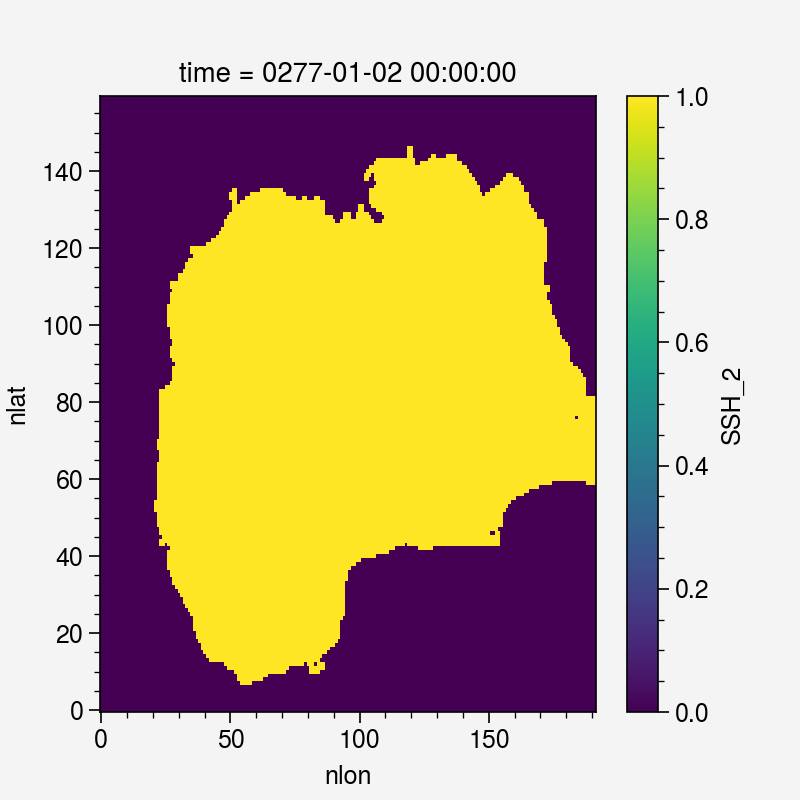

In [7]:
# create mask for GoM
ssh_r_HR = ds0_HR.SSH_2.isel(nlon=slice(nlon1_r_t12, nlon2_r_t12), nlat=slice(nlat1_r_t12, nlat2_r_t12), time=0)/100 # unit: [m]
kmt_r_HR = ds0_HR.KMT.isel(nlon=slice(nlon1_r_t12, nlon2_r_t12), nlat=slice(nlat1_r_t12, nlat2_r_t12))
ht_r_HR = ds0_HR.HT.isel(nlon=slice(nlon1_r_t12, nlon2_r_t12), nlat=slice(nlat1_r_t12, nlat2_r_t12))
tarea_r_HR = ds0_HR.TAREA.isel(nlon=slice(nlon1_r_t12, nlon2_r_t12), nlat=slice(nlat1_r_t12, nlat2_r_t12))/1e4 # unit: [m^2]

ssh_rm0_HR = ssh_r_HR.where(kmt_r_HR>0, np.nan) # m0: mask land point

nlon_r_TH = ssh_r_HR.nlon
nlat_r_TH = ssh_r_HR.nlat

ssh_rm1_HR = ssh_rm0_HR.where(((nlat_r_TH<100) | (nlon_r_TH<180)), np.nan) # mask upper right corner
ssh_rm2_HR = ssh_rm1_HR.where(((nlat_r_TH>(1403-1-nlat1_r_t12)) | (nlon_r_TH<(230-1-nlon1_r_t12))), np.nan) # mask Yucatan channel zonal
ssh_rm3_HR = ssh_rm2_HR.where(((nlat_r_TH>(35)) | (nlon_r_TH<(110))), np.nan) # mask Yucatan channel zonal
ssh_rm4_HR = ssh_rm3_HR.where(((nlat_r_TH>(1406-1-nlat1_r_t12)) | (nlon_r_TH<(256-1-nlon1_r_t12))), np.nan) # mask Yucatan channel zonal
ssh_rm5_HR = ssh_rm4_HR.where(((nlat_r_TH>(1406-1-nlat1_r_t12+4)) | (nlon_r_TH<(256-1-nlon1_r_t12)+2)), np.nan) # mask Yucatan channel zonal
ssh_rm6_HR = ssh_rm5_HR.where(((nlat_r_TH>(1406-1-nlat1_r_t12+10)) | (nlon_r_TH<(256-1-nlon1_r_t12)+7)), np.nan) # mask Yucatan channel zonal

mask_r = xr.ufuncs.isfinite(ssh_rm6_HR) # mask for GoM, exact same boundary at Yucatan channel and Florida Strait
mask_r.plot()
mask_r

<xarray.DataArray 'SSH_2' (time: 31, nlat: 160, nlon: 192)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * time     (time) object 0277-01-02 00:00:00 ... 0277-02-01 00:00:00
    ULONG    (nlat, nlon) float64 -99.9 -99.8 -99.7 ... -81.04 -80.94 -80.84
    ULAT     (nlat, nlon) float64 17.62 17.62 17.62 17.62 ... 31.68 31.69 31.69
    TLONG    (nlat, nlon) float64 260.1 260.1 260.2 260.3 ... 278.9 279.0 279.1
    TLAT     (nlat, nlon) float64 17.57 17.57 17.57 17.57 ... 31.64 31.65 31.65
Dimensions without coordinates: nlat, nlon

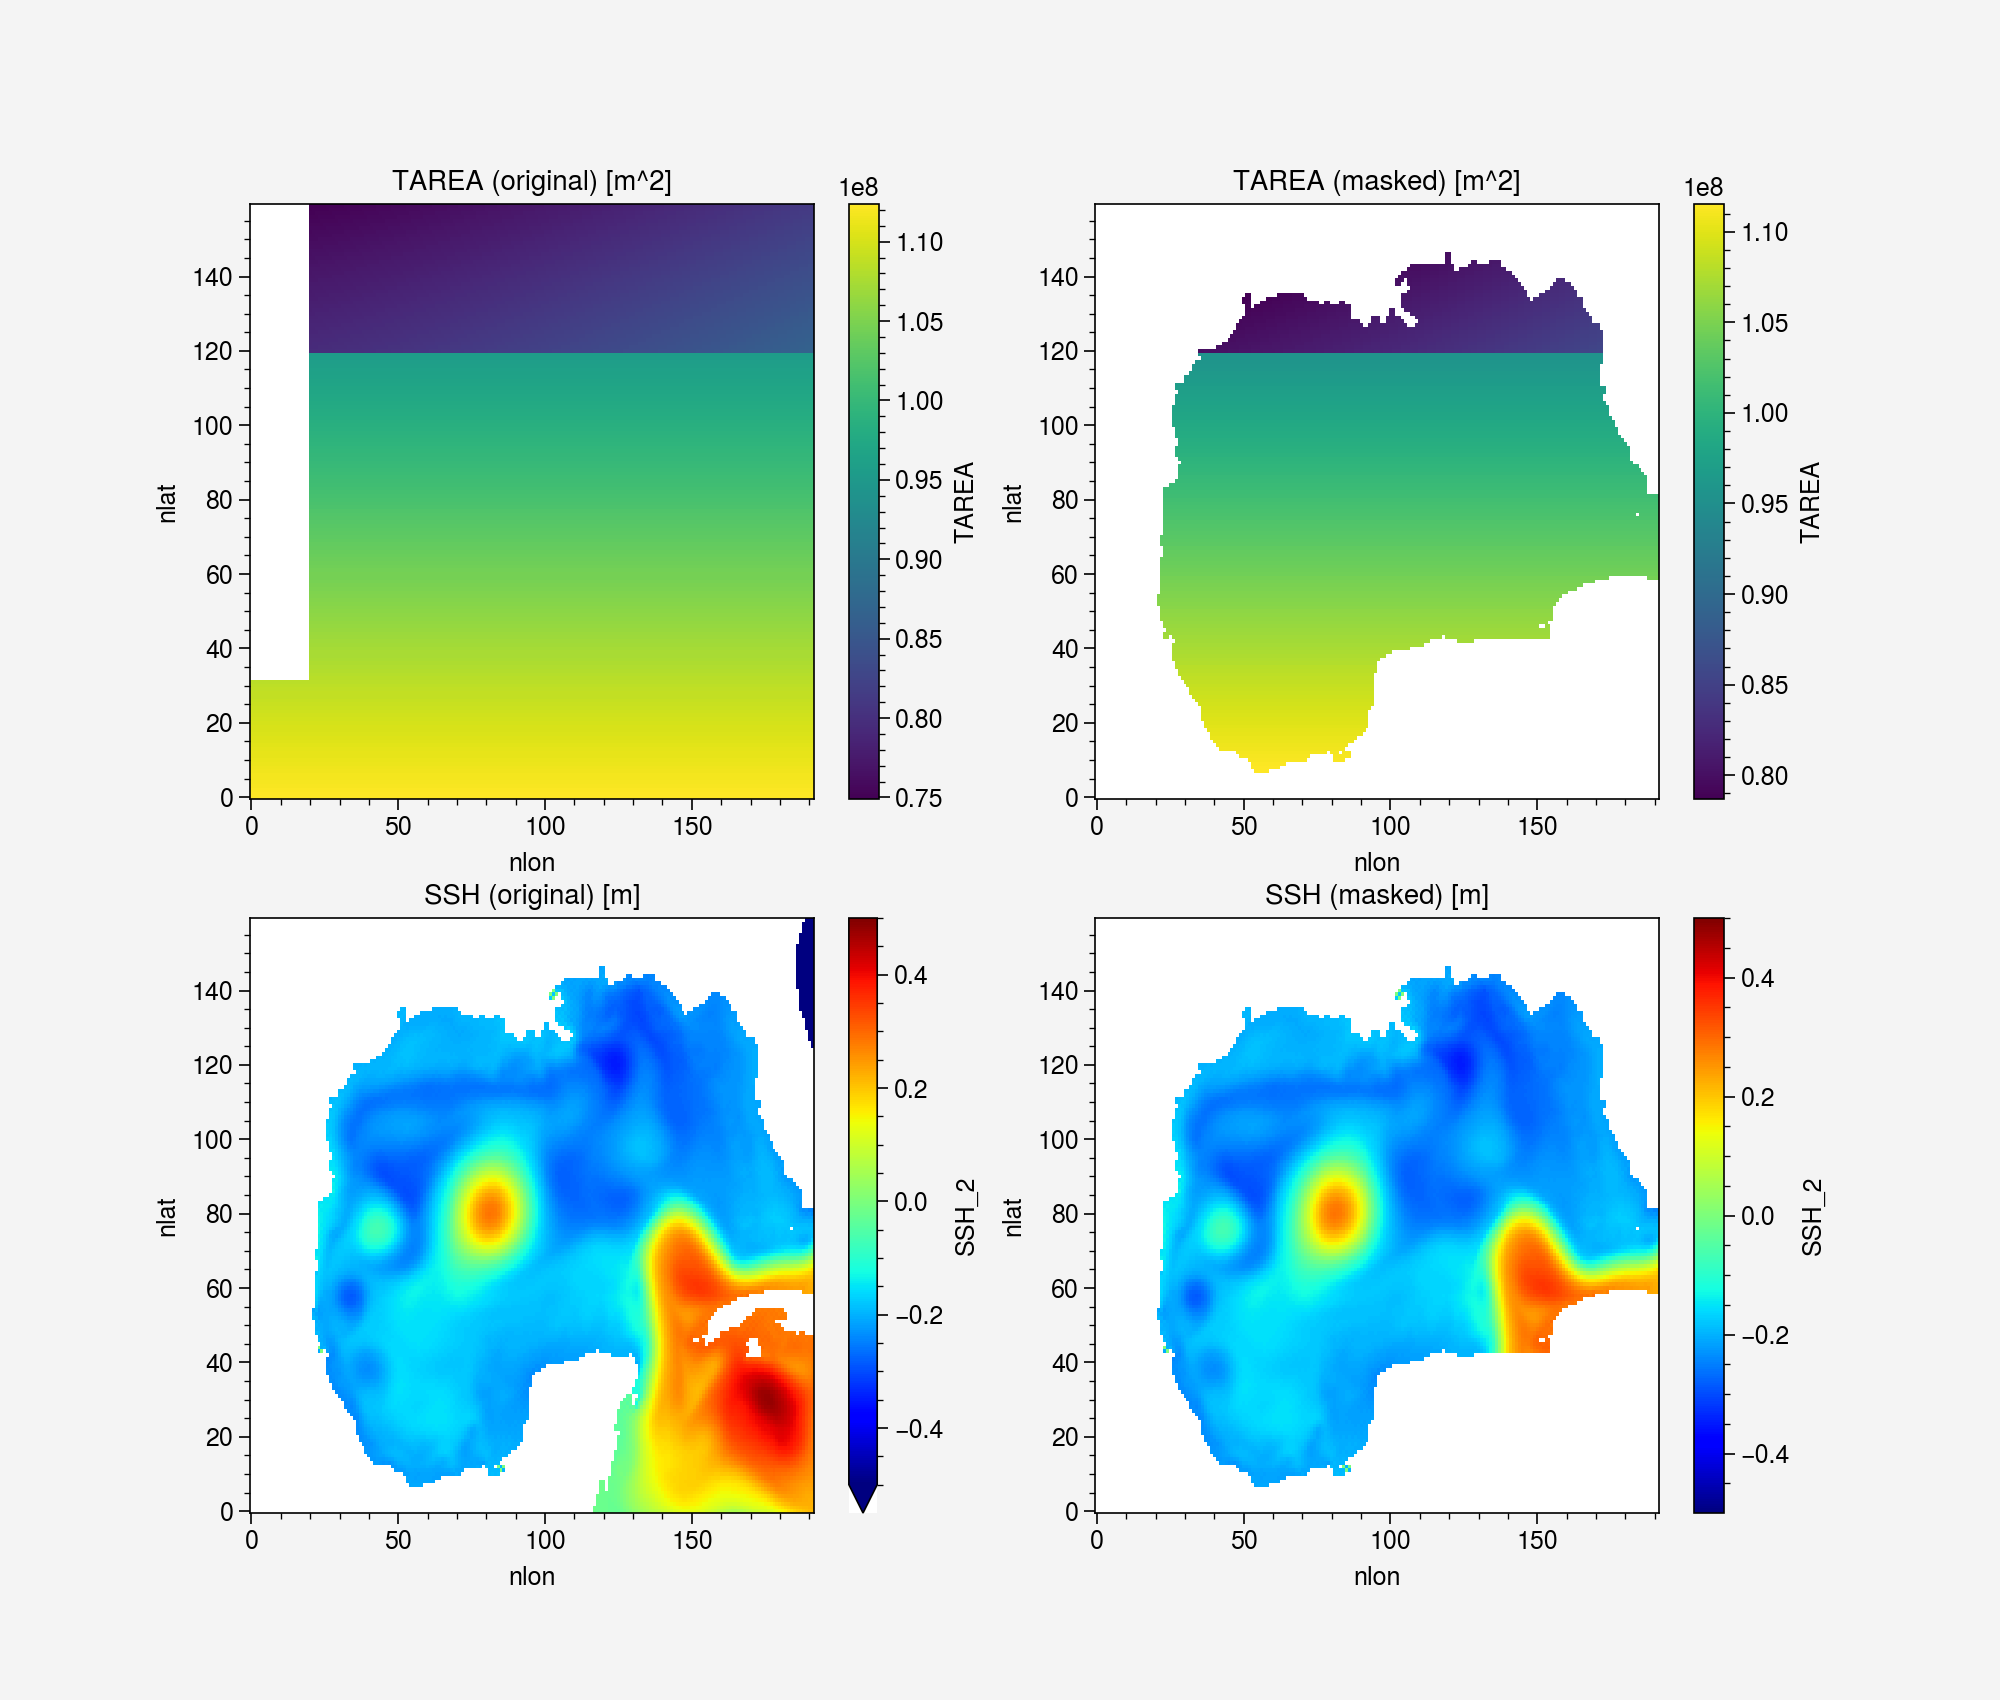

In [8]:
# check GoM mask
tarea_rm_HR = tarea_r_HR.where(mask_r, np.nan) # unit: [m^2]
ssh_rm_TH = ssh_r_TH.where(mask_r, np.nan) # unit: [m]

fig, axs = plt.subplots(2,2, figsize=(10,8.5))
tarea_r_HR.plot(ax=axs[0,0])
axs[0,0].set_title('TAREA (original) [m^2]')
tarea_rm_HR.plot(ax=axs[0,1])
axs[0,1].set_title('TAREA (masked) [m^2]')
ssh_r_TH.isel(time=0).plot(ax=axs[1,0], vmin=-0.5, vmax=0.5,cmap='jet')
axs[1,0].set_title('SSH (original) [m]')
ssh_rm_TH.isel(time=0).plot(ax=axs[1,1], vmin=-0.5, vmax=0.5,cmap='jet')
axs[1,1].set_title('SSH (masked) [m]')
ssh_rm_TH

<xarray.DataArray (time: 31)>
array([ 0.00000000e+00, -6.61209323e+09, -7.10077815e+09,  9.05045914e+09,
       -9.12262015e+09, -1.53390082e+10,  6.62521620e+09, -2.89000612e+10,
       -5.21630806e+10,  1.70446080e+10, -5.80608188e+10, -3.18195711e+10,
       -2.45467970e+10, -3.04455063e+10,  1.70259797e+10,  6.03842786e+09,
       -9.26633748e+09,  2.72713311e+10, -2.38422863e+10, -7.93561113e+09,
       -5.30452099e+10, -7.64518826e+10, -6.12633212e+10, -6.87628305e+10,
       -3.25437898e+10, -3.42489031e+10, -3.96497020e+10, -2.95777744e+10,
       -1.35443972e+10, -7.85238137e+10, -2.24208711e+10])
Coordinates:
  * time     (time) object 0277-01-02 00:00:00 ... 0277-02-01 00:00:00

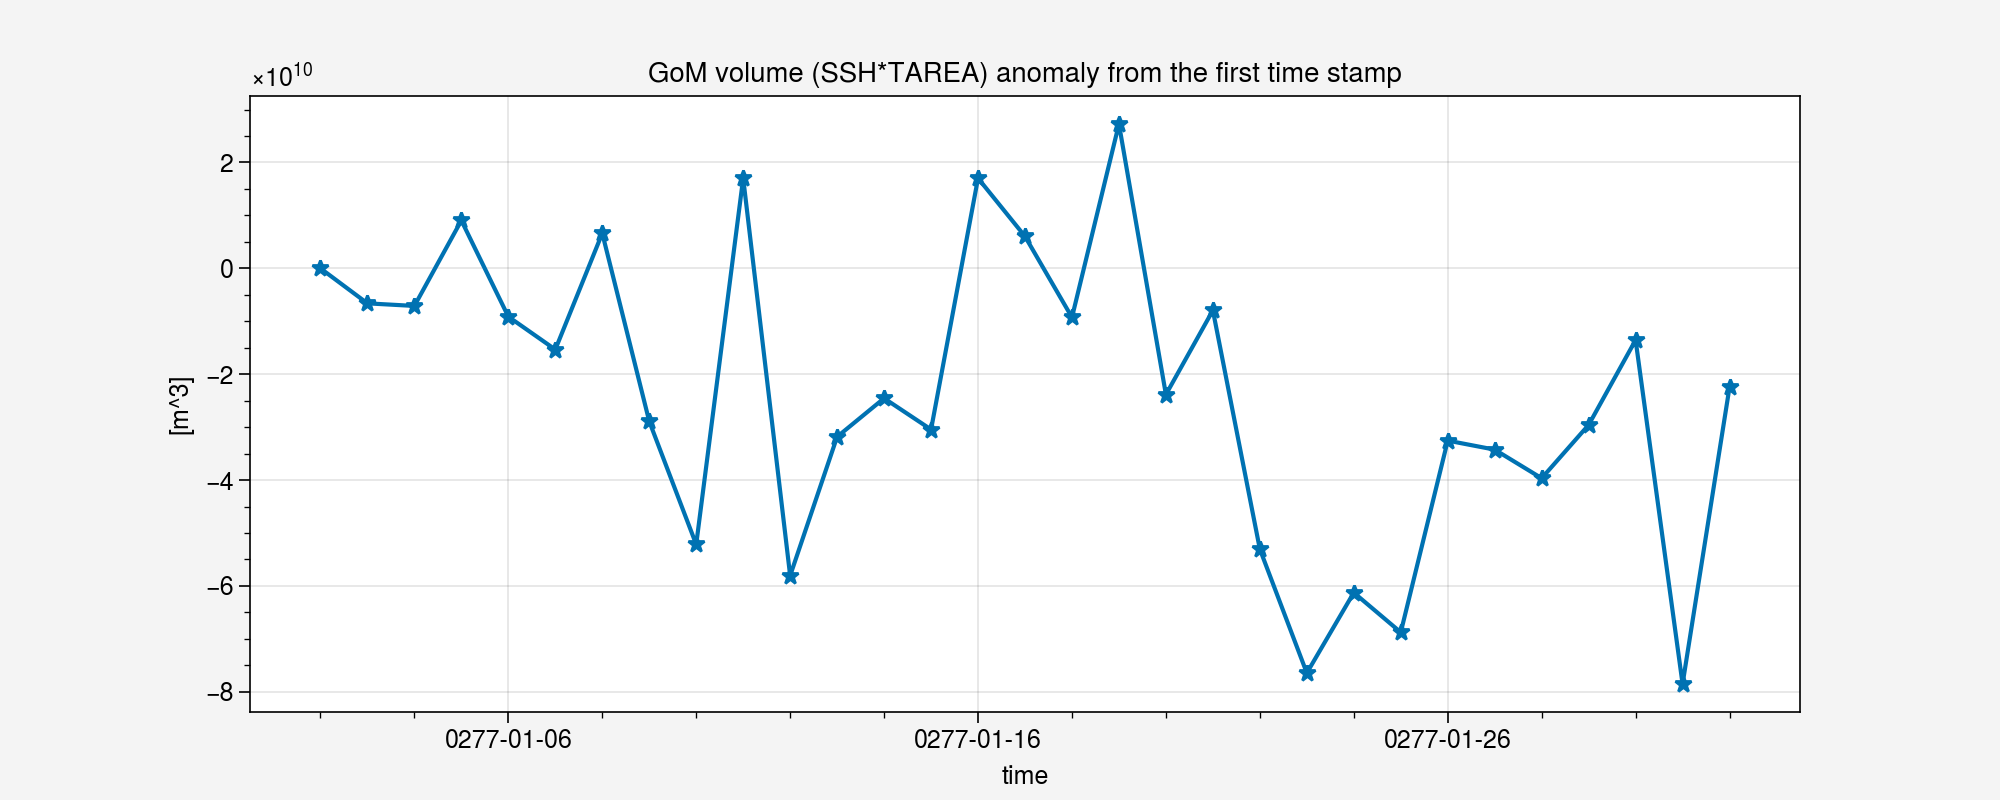

In [9]:
# Compute GoM volume: GoM volume = SSH * TAREA
V1_r_TH = (ssh_rm_TH*tarea_rm_HR).sum(('nlon','nlat'), skipna=True) # unit: [m^3]
V1a_r_TH = V1_r_TH - V1_r_TH.isel(time=0) # anomaly from the first time stamp
fig, axs = plt.subplots(1,1, figsize=(10,4))
V1a_r_TH.plot(ax=axs, marker='*')
axs.set_title('GoM volume (SSH*TAREA) anomaly from the first time stamp')
axs.set_ylabel('[m^3]')
V1a_r_TH

<xarray.DataArray 'channel_name' (time: 730)>
array(['Florida Strait', 'Florida Strait', 'Florida Strait',
       'Florida Strait', 'Florida Strait', 'Florida Strait',
       'Florida Strait', 'Florida Strait', 'Florida Strait',
       'Florida Strait', 'Florida Strait', 'Florida Strait',
       'Florida Strait', 'Florida Strait', 'Florida Strait',
       'Florida Strait', 'Florida Strait', 'Florida Strait',
       'Florida Strait', 'Florida Strait', 'Florida Strait',
       'Florida Strait', 'Florida Strait', 'Florida Strait',
       'Florida Strait', 'Florida Strait', 'Florida Strait',
       'Florida Strait', 'Florida Strait', 'Florida Strait',
       'Florida Strait', 'Florida Strait', 'Florida Strait',
       'Florida Strait', 'Florida Strait', 'Florida Strait',
       'Florida Strait', 'Florida Strait', 'Florida Strait',
       'Florida Strait', 'Florida Strait', 'Florida Strait',
       'Florida Strait', 'Florida Strait', 'Florida Strait',
       'Florida Strait', 'Florida Strai

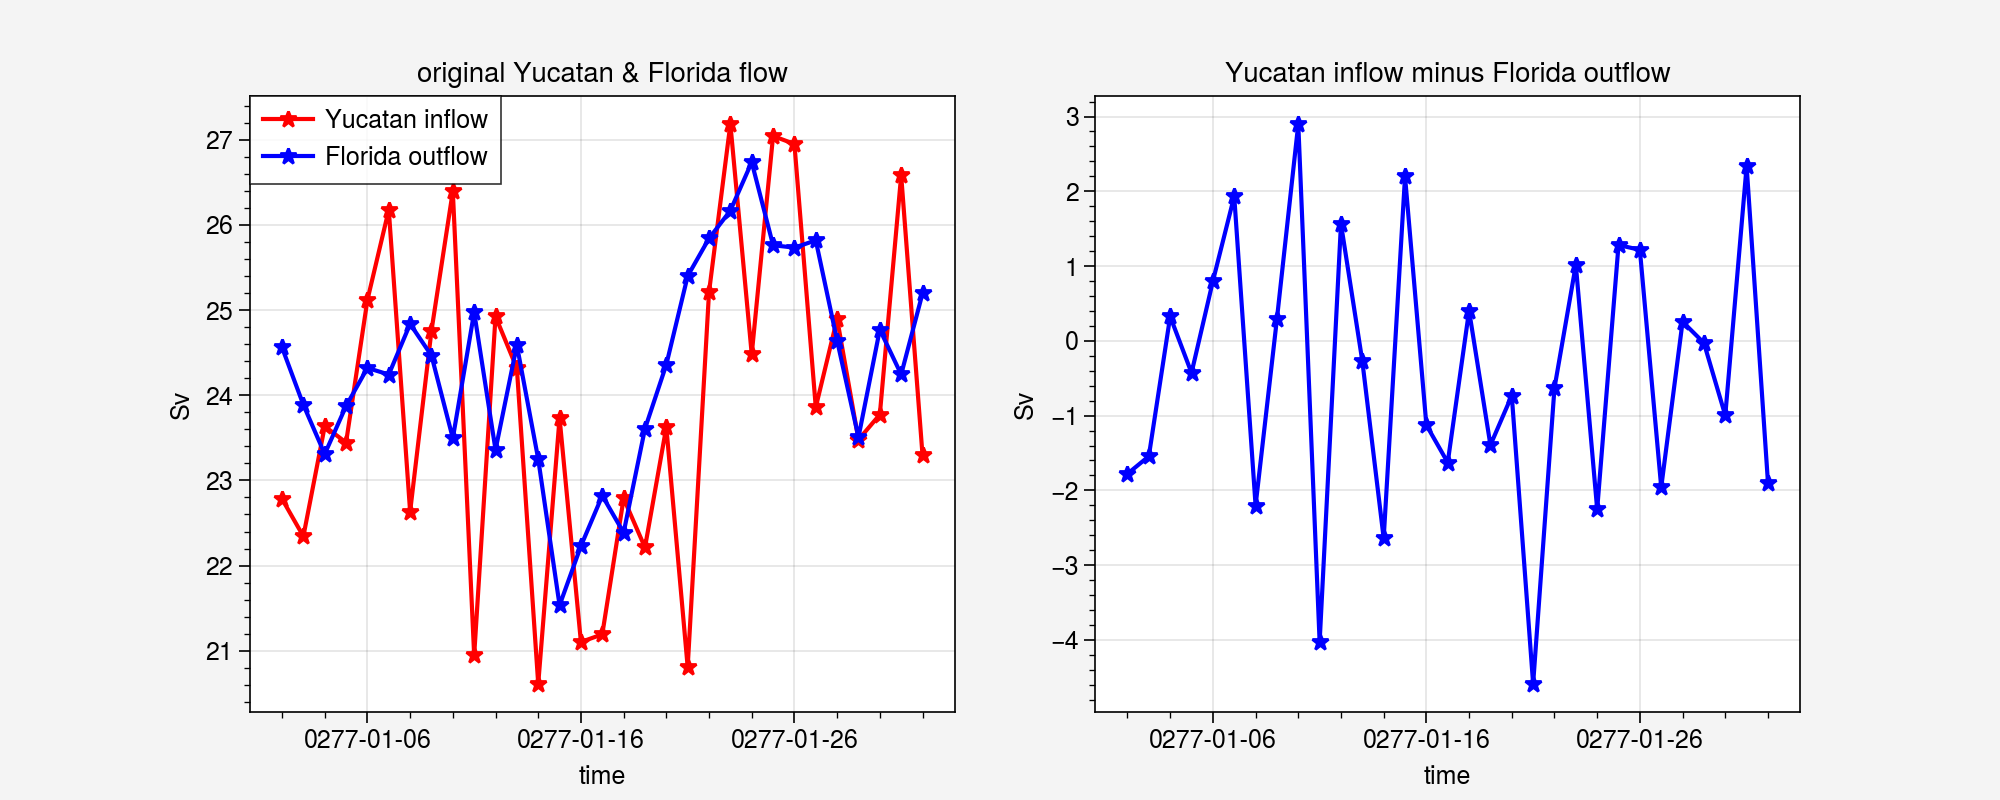

In [10]:
# extract Florida Strait and Yucatan Channel diagnostic transports
nchannel = 141
ds_FSm_TH = df_TH.iloc[1::nchannel,:].to_xarray()
ds_YCz_TH = df_TH.iloc[2::nchannel,:].to_xarray()
ds_YCm_TH = df_TH.iloc[3::nchannel,:].to_xarray()
ds_YCz_TH

time_TH = cftime.num2date(ds_FSm_TH.time, units='days since 0001-01-01 :00:00', calendar='noleap')

ds_FSm_TH = ds_FSm_TH.assign_coords(time=time_TH)
ds_YCz_TH = ds_YCz_TH.assign_coords(time=time_TH) 
ds_YCm_TH = ds_YCm_TH.assign_coords(time=time_TH) 
print(ds_FSm_TH.channel_name) # check channel name to ensure correct extraction 

# Qv: volume flux Sv = 1e6[m^3/s]
Qv_FSm_TH = ds_FSm_TH.Qv.sel(time=slice('0277-01-01','0277-02-01'))
Qv_YCz_TH = ds_YCz_TH.Qv.sel(time=slice('0277-01-01','0277-02-01'))
Qv_YCm_TH = ds_YCm_TH.Qv.sel(time=slice('0277-01-01','0277-02-01'))
print(Qv_FSm_TH.time) # check time to ensure correct extraction

fig, axs = plt.subplots(1,2,figsize=(10,4))
(Qv_YCz_TH-Qv_YCm_TH).plot(ax=axs[0],color='r', marker='*',label='Yucatan inflow') 
# net Yucatan Channel inflow, positive Qv_YCm_TH means flow out of GoM
Qv_FSm_TH.plot(ax=axs[0],color='b', marker='*',label='Florida outflow')
axs[0].legend()
axs[0].set_ylabel('Sv')
axs[0].set_title('original Yucatan & Florida flow')

(Qv_YCz_TH-Qv_YCm_TH-Qv_FSm_TH).plot(ax=axs[1],color='b', marker='*') 
axs[1].set_ylabel('Sv')
axs[1].set_title('Yucatan inflow minus Florida outflow');
fig.savefig('YucatanChannelFloridaStraitFlow_2021Nov03.png', bbox_inches='tight')

# compare GoM volume change with net inflows

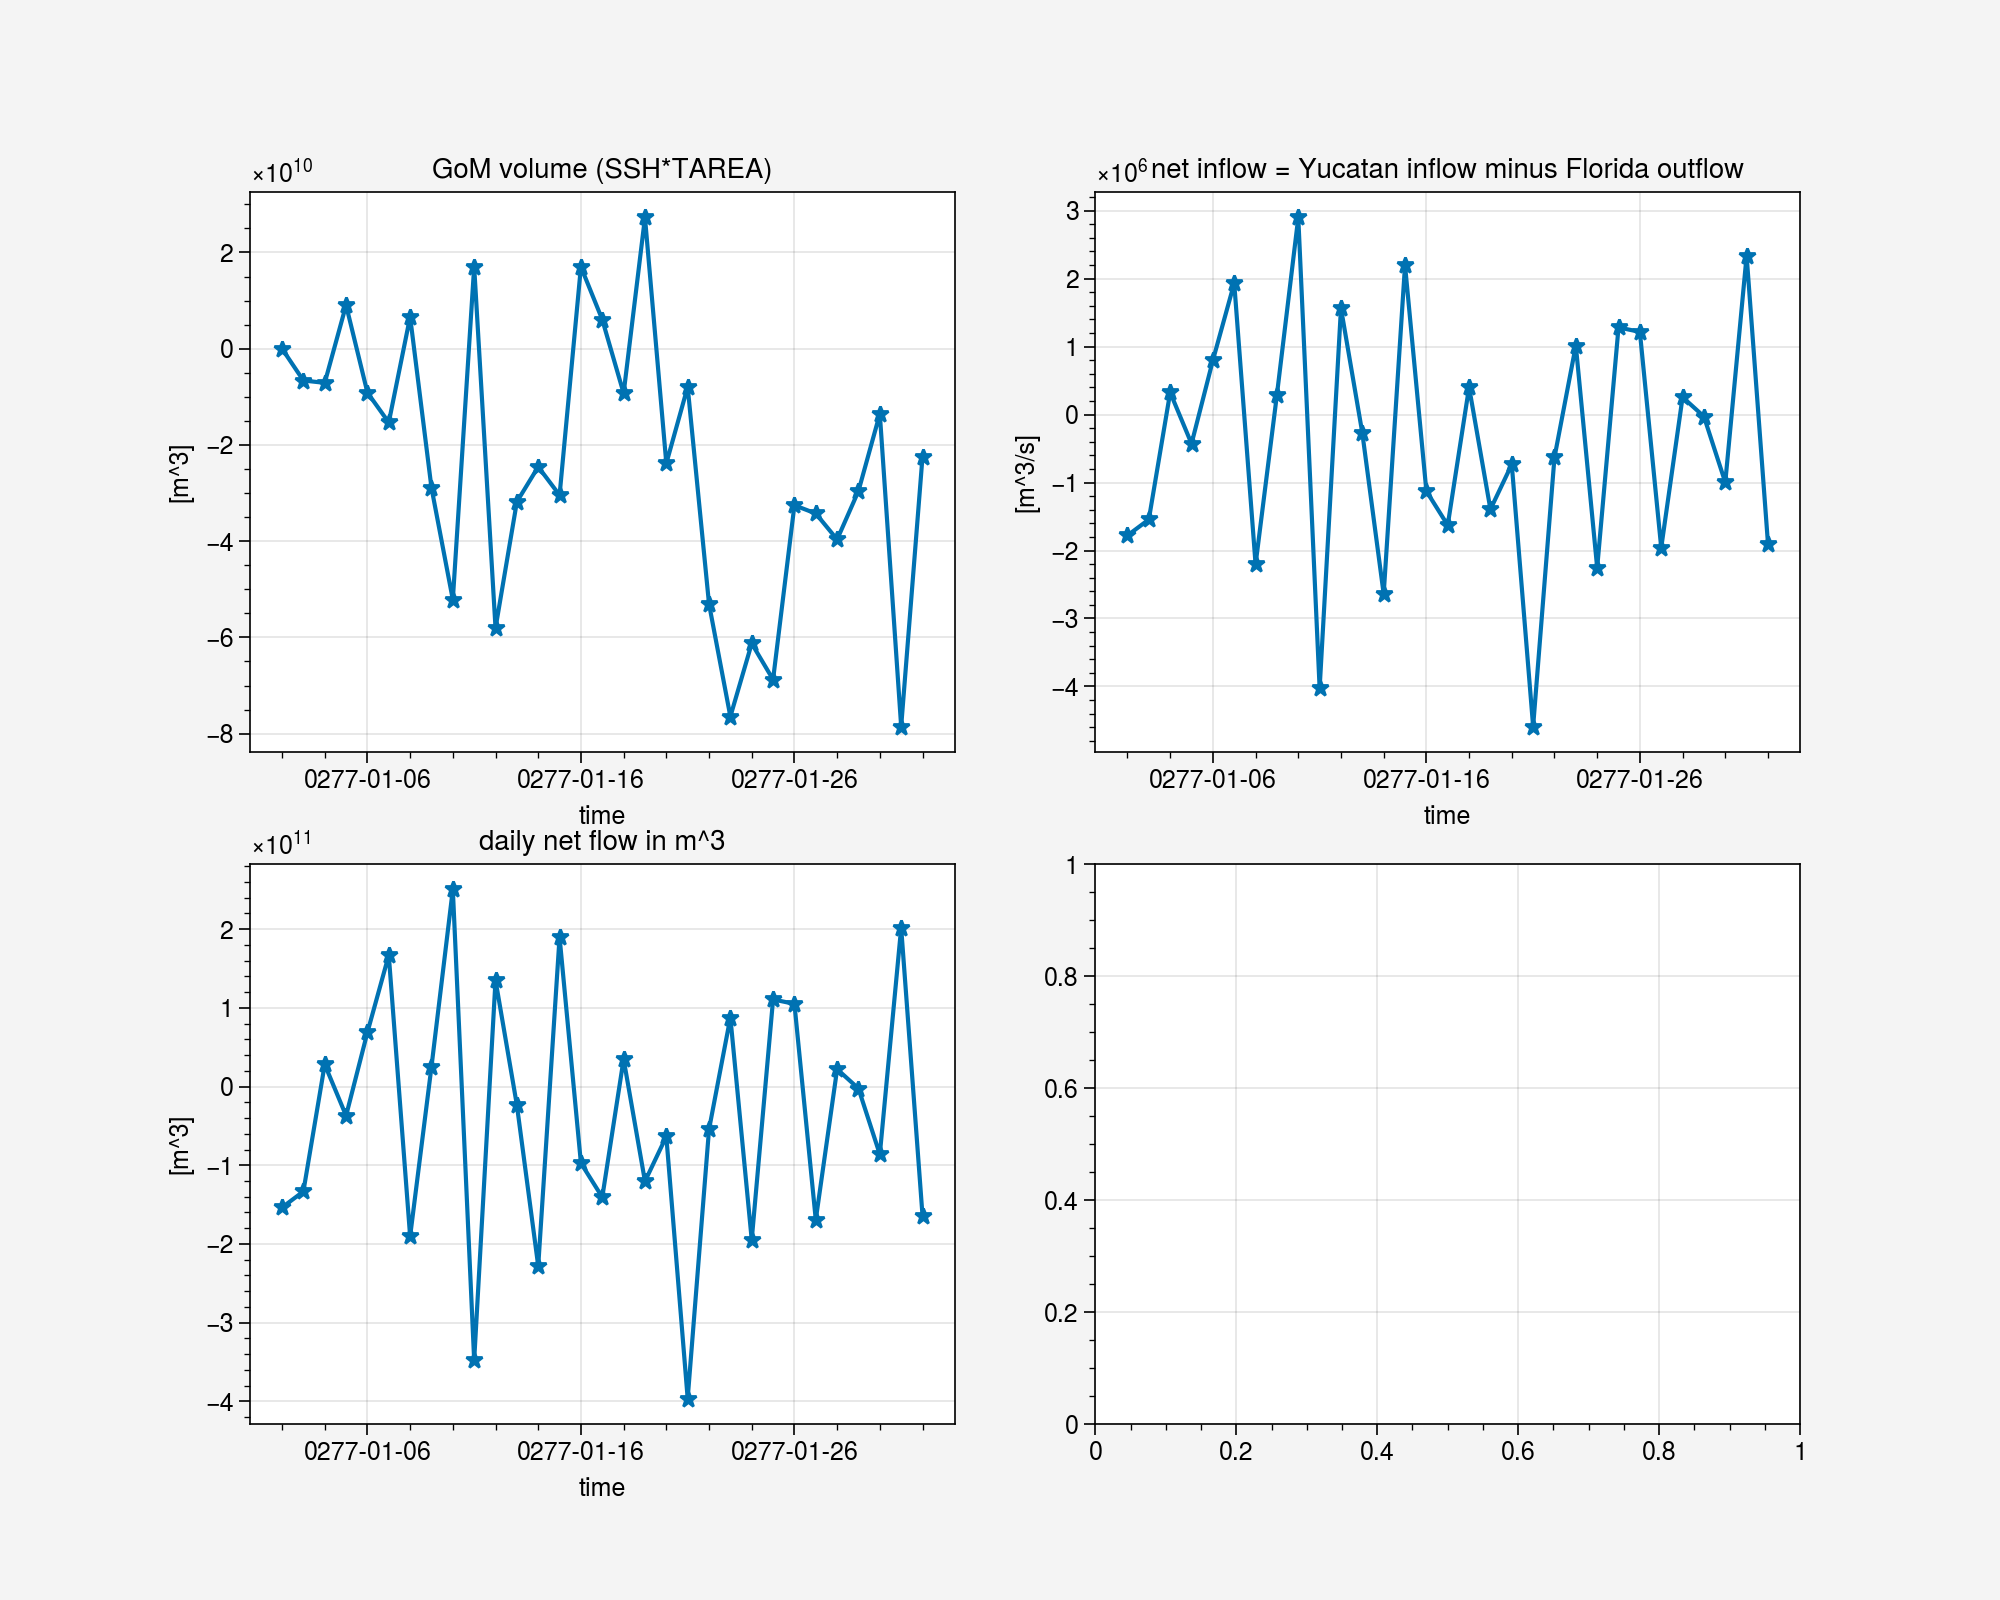

In [11]:
fig, axs = plt.subplots(2,2, figsize=(10,8))
V1a_r_TH.plot(ax=axs[0,0], marker='*')
axs[0,0].set_title('GoM volume (SSH*TAREA)')
axs[0,0].set_ylabel('[m^3]')

((Qv_YCz_TH-Qv_YCm_TH-Qv_FSm_TH)*1e6).plot(ax=axs[0,1], marker='*') 
axs[0,1].set_ylabel('[m^3/s]')
axs[0,1].set_title('net inflow = Yucatan inflow minus Florida outflow')

Qv_net_TH = (Qv_YCz_TH-Qv_YCm_TH-Qv_FSm_TH)*1e6 #[m^3/s]
Tv_net_day_TH = Qv_net_TH*86400 #convert unit: [m^3/s] --> [m^3], T: transport
Tv_net_day_TH.plot(ax=axs[1,0], marker='*')
axs[1,0].set_ylabel('[m^3]')
axs[1,0].set_title('daily net flow in m^3');

(30,)
[-1.43501328e+11 -5.26117248e+10 -4.45551840e+09  1.59465456e+10
  1.17998973e+11 -1.16704541e+10 -8.25726787e+10  1.37903485e+11
 -4.87469102e+10 -1.06402905e+11  5.58729274e+10 -1.25808401e+11
 -1.91027549e+10  4.63055486e+10 -1.18978278e+11 -5.29054243e+10
 -4.28114635e+10 -9.19162210e+10 -2.29954779e+11 -2.25498129e+11
  1.66674197e+10 -5.34936571e+10 -4.20155208e+10  1.07927048e+11
 -3.20727125e+10 -7.35678461e+10  9.82755936e+09 -4.43344838e+10
  5.78804098e+10  1.89262699e+10]
<xarray.DataArray ()>
array(0.)
Coordinates:
    time     object 0277-01-02 00:00:00
[ 0.00000000e+00 -1.43501328e+11 -5.26117248e+10 -4.45551840e+09
  1.59465456e+10  1.17998973e+11 -1.16704541e+10 -8.25726787e+10
  1.37903485e+11 -4.87469102e+10 -1.06402905e+11  5.58729274e+10
 -1.25808401e+11 -1.91027549e+10  4.63055486e+10 -1.18978278e+11
 -5.29054243e+10 -4.28114635e+10 -9.19162210e+10 -2.29954779e+11
 -2.25498129e+11  1.66674197e+10 -5.34936571e+10 -4.20155208e+10
  1.07927048e+11 -3.20727125e+

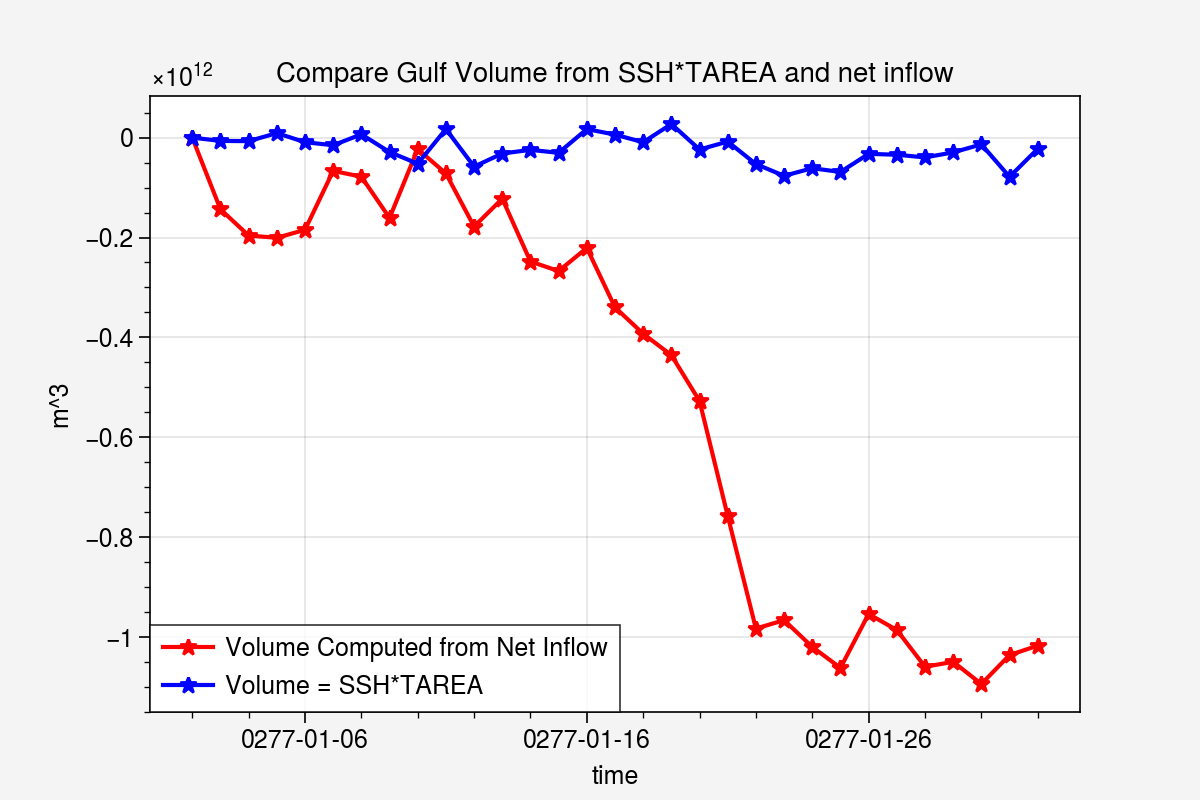

In [12]:
# compute transport: transport from day 0 to day 1 = 0.5*(mean transport on day 0 + mean transport on day 1)
Tv_net_daynp_TH = (Tv_net_day_TH[0:-1].values + Tv_net_day_TH[1:].values)/2 

print(Tv_net_daynp_TH.shape)
print(Tv_net_daynp_TH)
print(V1a_r_TH[0])

Tv_net_daynp1_TH = np.insert(Tv_net_daynp_TH, 0, V1a_r_TH[0].values)
print(Tv_net_daynp1_TH)

Tv_net_day_TH = xr.DataArray(

    data=Tv_net_daynp1_TH,

    dims=["time"],

    coords=dict(
        time=Qv_YCm_TH.time,
    ),)
Tv_net_day_TH 

fig, axs = plt.subplots(1,1,figsize=(6,4))
Tv_net_day_TH.cumsum('time').plot(ax=axs, marker='*', color='r', label='Volume Computed from Net Inflow')
V1a_r_TH.plot(ax=axs, marker='*', color='b', label='Volume = SSH*TAREA')
axs.legend()
axs.set_ylabel('m^3')
axs.set_title('Compare Gulf Volume from SSH*TAREA and net inflow');

fig.savefig('CompareGulfVolume_2021Nov03.png', bbox_inches='tight')

# Appendix